                                                            ABSTRACT


                                                    Predictive Maintenance

                                                         Eray BATTAL




*Predictive maintenance is a proactive maintenance strategy that uses data-driven techniques to predict when equipment is likely to fail, so that maintenance can be scheduled in advance to prevent unscheduled downtime. It involves collecting data from sensors on equipment, analyzing the data to identify patterns that indicate impending failures, and using the insights gained from the analysis to schedule maintenance at the most appropriate time. Predictive maintenance can help improve equipment reliability, reduce maintenance costs, and increase overall equipment effectiveness. In this report, we present a comprehensive analysis of Predictive Maintenance using a variety Time Series Analysis.Our results show that these models are able to accurately classify failure with a high degree of accuracy. Overall, our findings suggest that Classification Algorithms in Machine Learning can be a valuable tool in the analysis of time series and Predicting the type of the failure and can have significant practical applications in ındustrial fields such as predicting machines failure, calculating machines remain life*







**Keywords:** Machine learning, Clustering

1.INTRODUCTION
1.1. Introduction to Predictive Maintenance
The focus of this report is the use of Data Analysis techniques for Predictive Maintenance.Predictive maintenance is a proactive maintenance strategy that uses data-driven techniques to predict when equipment is likely to fail, so that maintenance can be scheduled in advance to prevent unscheduled downtime. It involves collecting data from sensors on equipment, analyzing the data to identify patterns that indicate impending failures, and using the insights gained from the analysis to schedule maintenance at the most appropriate time. Predictive maintenance can help improve equipment reliability, reduce maintenance costs, and increase overall equipment effectiveness. It can also help organizations to be more proactive in their maintenance efforts, rather than relying on reactive maintenance practices.Predictive Maintenance have significant practical applications in ındustrial fields such as predicting machines failure, calculating machines remain life.

1.2. Related Works
There have been numerous studies and projects focused on the use of Predictive Maintenance.Predictive maintenance is a proactive maintenance strategy that uses data-driven techniques to predict when equipment is likely to fail, so that maintenance can be scheduled in advance to prevent unscheduled downtime. There have been numerous studies conducted on the effectiveness of predictive maintenance in various industries, and the results generally show that it can provide significant benefits over traditional reactive maintenance approaches. One study found that implementing a predictive maintenance program resulted in a 50% reduction in equipment failures and a 75% reduction in maintenance costs (Wang et al., 2014).One way to classify predictive maintenance is by the type of data used. This can include condition-based data, such as vibration data, temperature data, and oil analysis data, as well as performance-based data, such as production rates and energy consumption data.A third way to classify predictive maintenance is by the frequency of maintenance activities. This can include continuous monitoring, in which data is collected and analyzed in real-time, as well as periodic monitoring, in which data is collected and analyzed at regular intervals. Another study found that predictive maintenance can improve equipment reliability by up to 80% (Gao et al., 2016).Predictive maintenance has also been shown to reduce downtime, increase production efficiency, and improve safety by identifying and addressing potential hazards before they occur (Li et al., 2018).Another way to classify predictive maintenance is by the methods used to analyze the data. This can include statistical analysis methods, such as regression analysis and time series analysis, as well as machine learning methods, such as neural networks and support vector machines. Case studies in industries such as manufacturing (Zhang et al., 2019), aviation (Kim et al., 2016), and power generation (Liu et al., 2017) have demonstrated the success of predictive maintenance in specific contexts, with significant cost savings and improved equipment performance reported.However, the success of a predictive maintenance program depends on the quality of the data being collected and the accuracy of the predictive models used. Therefore, it is important to invest in robust data collection and analysis systems and to regularly review and refine the predictive models (Zhang et al., 2020).
Overall, the literature suggests that predictive maintenance can provide significant benefits for organizations looking to improve equipment reliability and reduce maintenance costs.

References:

Gao, Z., Li, L., & Chen, Q. (2016). A review on predictive maintenance of machinery. Measurement, 89, 225-237.

Kim, J. H., Lee, J. H., & Koo, C. H. (2016). Predictive maintenance system for aircraft engines using vibration analysis. Aerospace Science and Technology, 52, 71-78.

Li, X., Wu, Z., & Liu, Y. (2018). Predictive maintenance optimization for wind turbine systems based on a hybrid approach. Renewable Energy, 121, 52-62.

Liu, X., Zhang, J., & Gao, Z. (2017). A review of predictive maintenance technologies for power transformers. Renewable and Sustainable Energy Reviews, 75, 539-555.

Wang, Q., Gao, Z., & Li, L. (2014). A review of predictive maintenance technologies. Measurement, 47, 8-21.

Zhang, Y., Gao, Z., & Li, L. (2019). A review of predictive maintenance technologies for pumps. Measurement, 146, 181-192.

Zhang, Y., Li, L., & Gao, Z. (2020). A review of predictive maintenance technologies for gear systems. Measurement, 168, 107999.

2. DATA PREPARTION
2.1. Dataset Overview
The dataset used for this study was collected through kaggle platform. This dataset has 8 Feature and 10K example. Dataset includes a tools machinery's enviromental datas such as Air Temperature,Process Temperature,Rotational Speed, Torque, Tool wear and Failure Type.Before start data preparation process we need to load libraries and set display settings.

In [515]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,log_loss,mean_squared_error
from sklearn.model_selection import train_test_split,learning_curve,cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [516]:
#Default theme
sns.set_theme(palette='tab10',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('dark_background')

In [517]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [518]:
df=pd.read_csv("predictive_maintenance.csv")
df = df.drop(["UDI","Product ID"],axis=1)
df.sample(6).style.set_properties(
    **{
        'background-color': 'Brown',
        'color': 'white',
        'border-color': 'White'
    })

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9399,L,297.800000,308.300000,1477,44.800000,170,0,No Failure
4727,M,303.400000,311.800000,1341,47.000000,210,1,Heat Dissipation Failure
5907,H,300.800000,310.400000,1419,46.400000,200,0,No Failure
7226,L,299.700000,309.600000,1399,51.300000,144,0,No Failure
9339,L,298.500000,309.000000,1458,44.800000,217,0,No Failure
8661,L,297.400000,308.500000,1643,33.800000,132,0,No Failure


2.2. Data Preparation Stages
When I display our data,I can see Air and Process Tempreture data are Kelvin but I want to study with Centimeter. So ı transformed my data to Centimeter. And I created a new columns as Temperature difference to get better score in my models as Feature Engineering.

In [519]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ]

df["Air temperature [K]"] = df["Air temperature [K]"] - 272.15
df["Process temperature [K]"] = df["Process temperature [K]"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"},inplace=True)

In [520]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
7197,L,27.85,37.85,1486,41.8,69,0,No Failure,10.0
6794,L,29.15,38.65,1428,55.2,88,0,No Failure,9.5
1995,L,26.15,35.85,1451,47.1,196,0,No Failure,9.7
194,M,26.05,36.35,2678,10.7,86,1,Power Failure,10.3
5777,L,29.45,38.95,1408,44.4,106,0,No Failure,9.5


3. EXPLORATORY DATA ANALYSIS OF THE PREPROCESSED DATASET
3.1. Identifying Data and Their Frequencies
I perform an exploratory data analysis of the preprocessed dataset to identify features frequencies. I start by checking shape and size of data and I continue with checkinh any null or nan data in it.
Than I controled its statistical informations as using "df.info()". The Feature that has the biggest range of data was Rotation Speed so ı can see the necessitiy of scaling in my data. For getting more informations, I plotted my features graphs one by one.

In [521]:
display(df.shape)
display(df.size)

(10000, 9)

90000

In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Type                         10000 non-null  object 
 1   Air temperature [°C]         10000 non-null  float64
 2   Process temperature [°C]     10000 non-null  float64
 3   Rotational speed [rpm]       10000 non-null  int64  
 4   Torque [Nm]                  10000 non-null  float64
 5   Tool wear [min]              10000 non-null  int64  
 6   Target                       10000 non-null  int64  
 7   Failure Type                 10000 non-null  object 
 8   Temperature difference [°C]  10000 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 703.2+ KB


In [523]:
df.describe().style.background_gradient(cmap="magma")

,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Temperature difference [°C]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,27.854930,37.855560,1538.776100,39.986910,107.951000,0.033900,10.000630
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,1.001094
min,23.150000,33.550000,1168.000000,3.800000,0.000000,0.000000,7.600000
25%,26.150000,36.650000,1423.000000,33.200000,53.000000,0.000000,9.300000
50%,27.950000,37.950000,1503.000000,40.100000,108.000000,0.000000,9.800000
75%,29.350000,38.950000,1612.000000,46.800000,162.000000,0.000000,11.000000
max,32.350000,41.650000,2886.000000,76.600000,253.000000,1.000000,12.100000


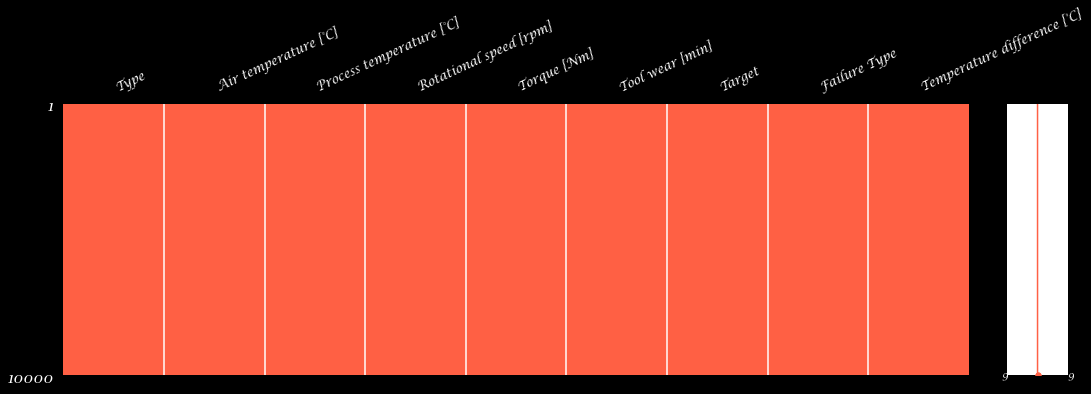

In [524]:
import missingno as msno
msno.matrix(df, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=25);

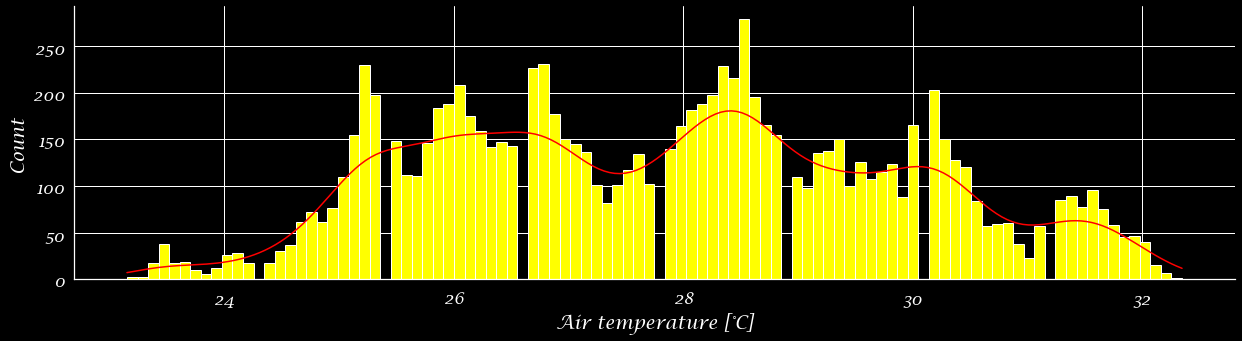

In [525]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

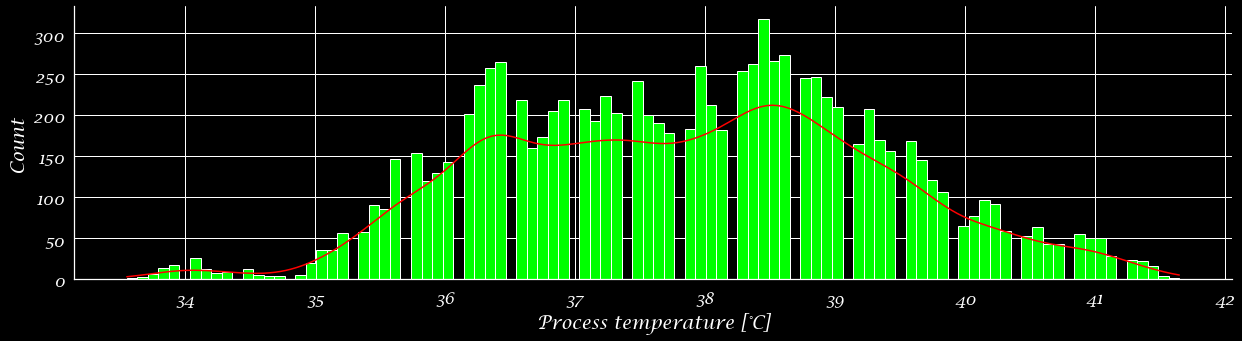

In [526]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "lime",height = 5, aspect = 3.5);

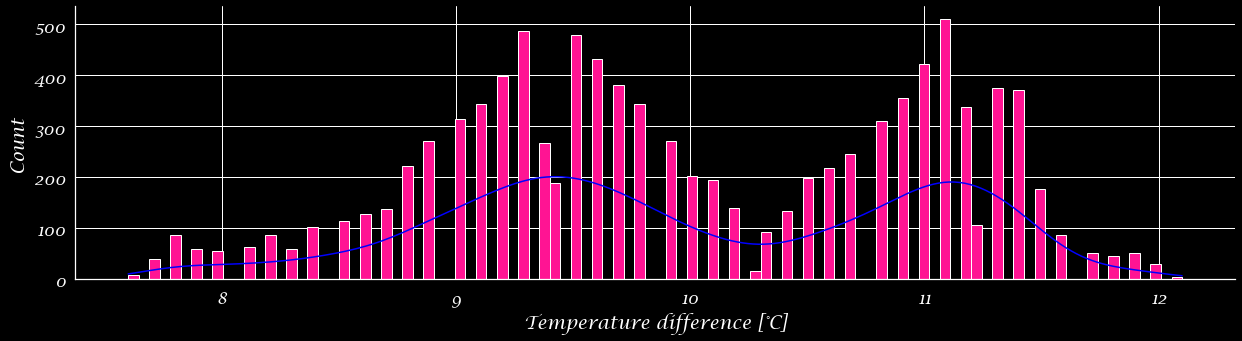

In [527]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "blue", facecolor = "DeepPink",height = 5, aspect = 3.5);

Then I print all kind of failure in my data with their number of apperience.

In [528]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts())
    print("****"*8)

L    6000
M    2997
H    1003
Name: Type, dtype: int64
********************************
0    9661
1     339
Name: Target, dtype: int64
********************************
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64
********************************


ın this chart, We can see the percentage of Types(M-L-H)

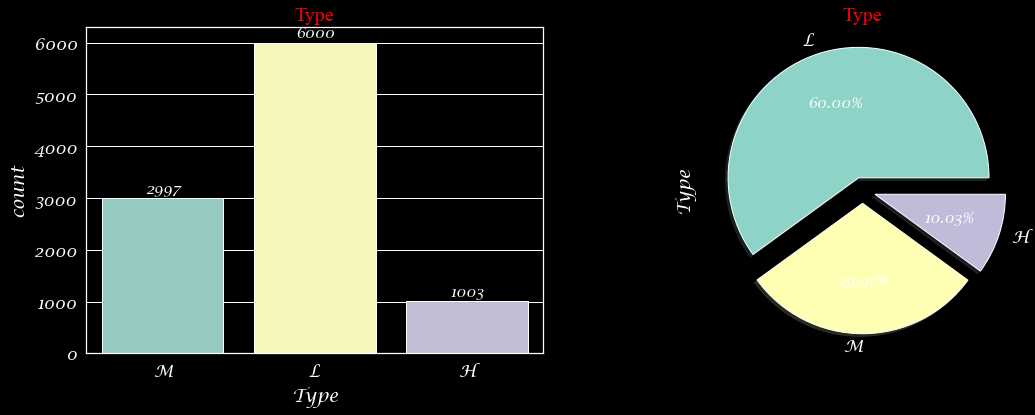

In [529]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red',font='Times New Roman');

In this chart, We can see the Percentage of Failed/Non-Failed.

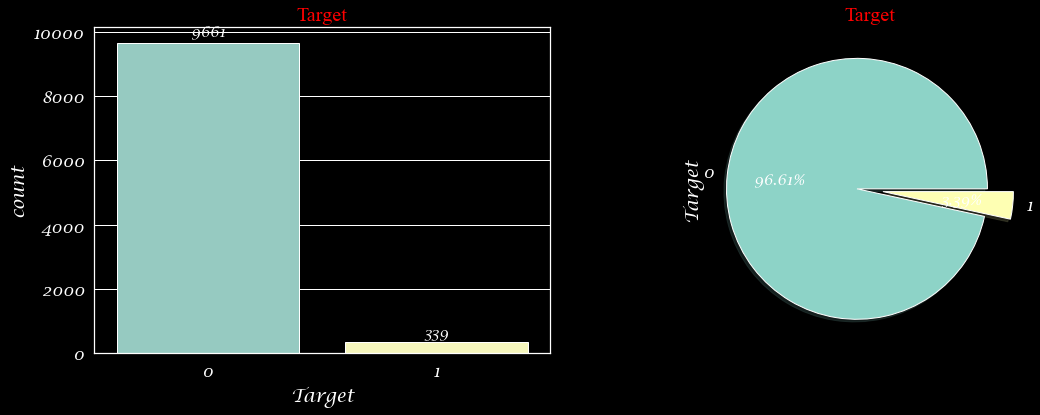

In [530]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red',font='Times New Roman')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red',font='Times New Roman');

In [531]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


Torque datas change range subject to failure types

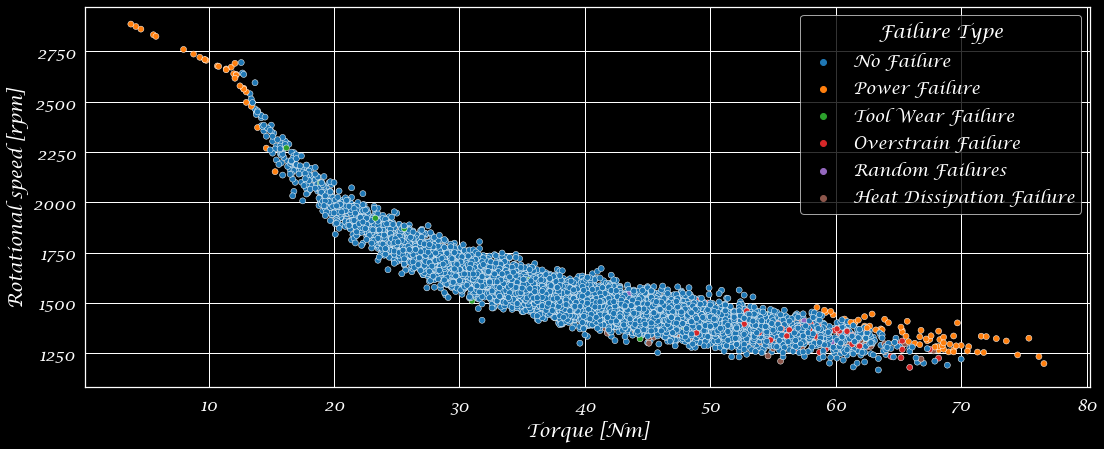

In [532]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",palette="tab10");

Torque datas change range subject to failure or not

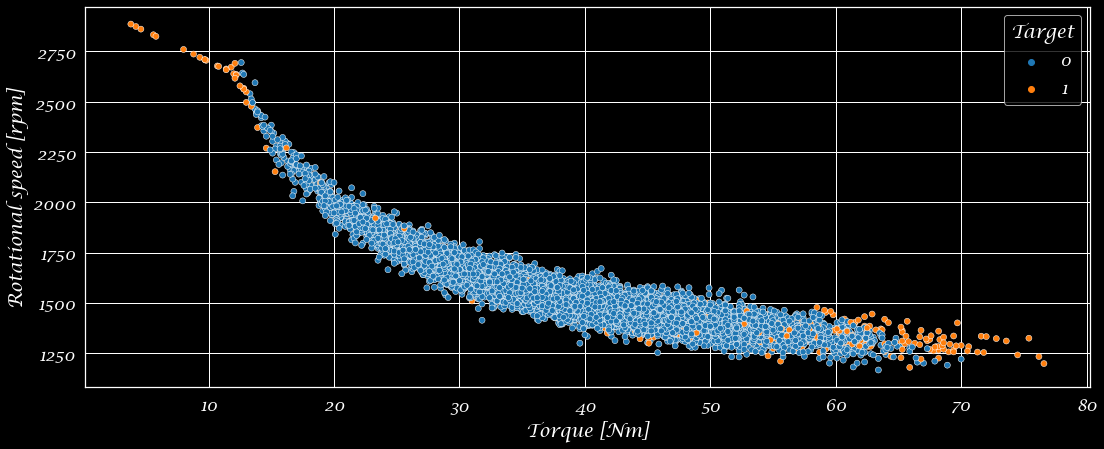

In [533]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

Torque datas change range subject to Types(M/L/H)

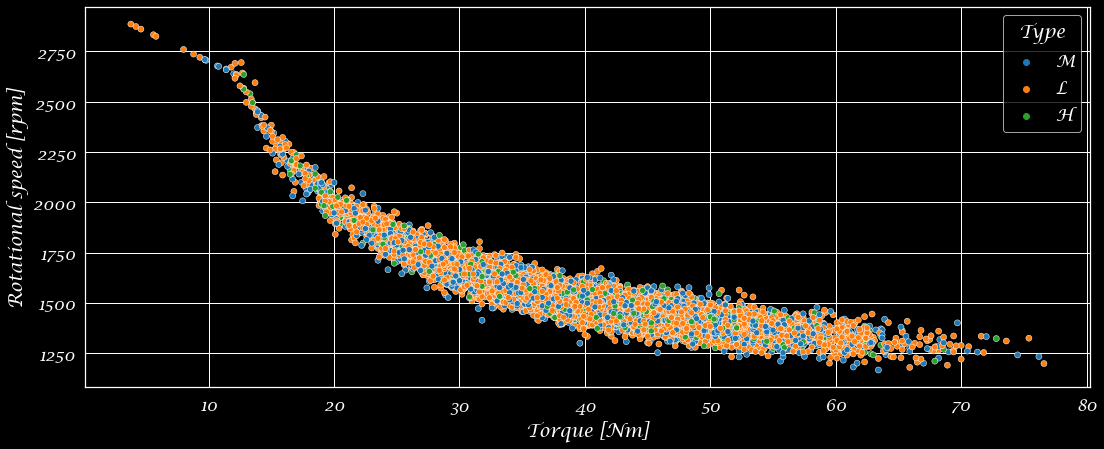

In [534]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

In [535]:
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,M,25.95,36.45,1551,42.8,0,0,No Failure,10.5
1,L,26.05,36.55,1408,46.3,3,0,No Failure,10.5


Failure types accuring subject to Torque

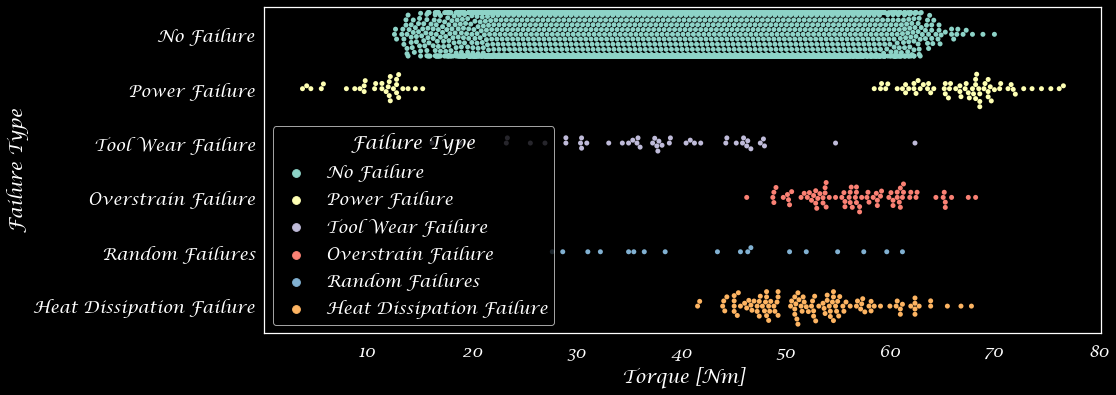

In [536]:
plt.figure(figsize = (15, 6))
plt.grid()
sns.swarmplot(df["Torque [Nm]"], df["Failure Type"], hue = df["Failure Type"]);

Then I draw Torque datas distribution.İts normal distrubition

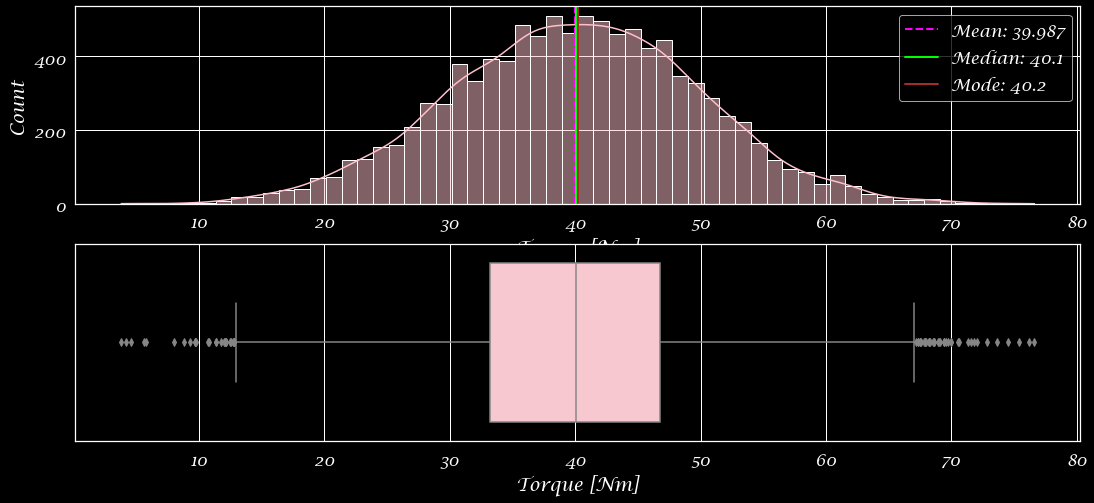

In [537]:
import statistics

def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))

    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='pink')

    ax[0].axvline(x = df[feature].mean(), color = 'Magenta', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'lime', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()

    sns.boxplot(x = df[feature], ax = ax[1],color='pink')

    plt.show()

plot_hist('Torque [Nm]')

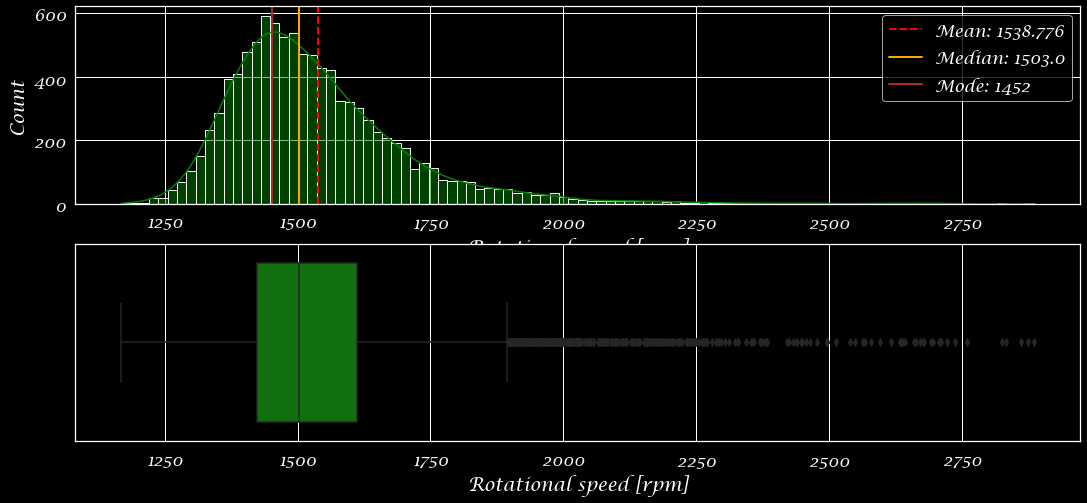

In [538]:
def plot_hist(feature):
    fig, ax = plt.subplots(2, 1, figsize=(18, 8))

    sns.histplot(data = df[feature], kde = True, ax = ax[0],color='green')

    ax[0].axvline(x = df[feature].mean(), color = 'red', linestyle = '--', linewidth = 2, label = 'Mean: {}'.format(round(df[feature].mean(), 3)))
    ax[0].axvline(x = df[feature].median(), color = 'orange', linewidth = 2, label = 'Median: {}'.format(round(df[feature].median(), 3)))
    ax[0].axvline(x = statistics.mode(df[feature]), color = 'brown', linewidth = 2, label = 'Mode: {}'.format(statistics.mode(df[feature])))
    ax[0].legend()

    sns.boxplot(x = df[feature], ax = ax[1],color='green')

    plt.show()

plot_hist('Rotational speed [rpm]')

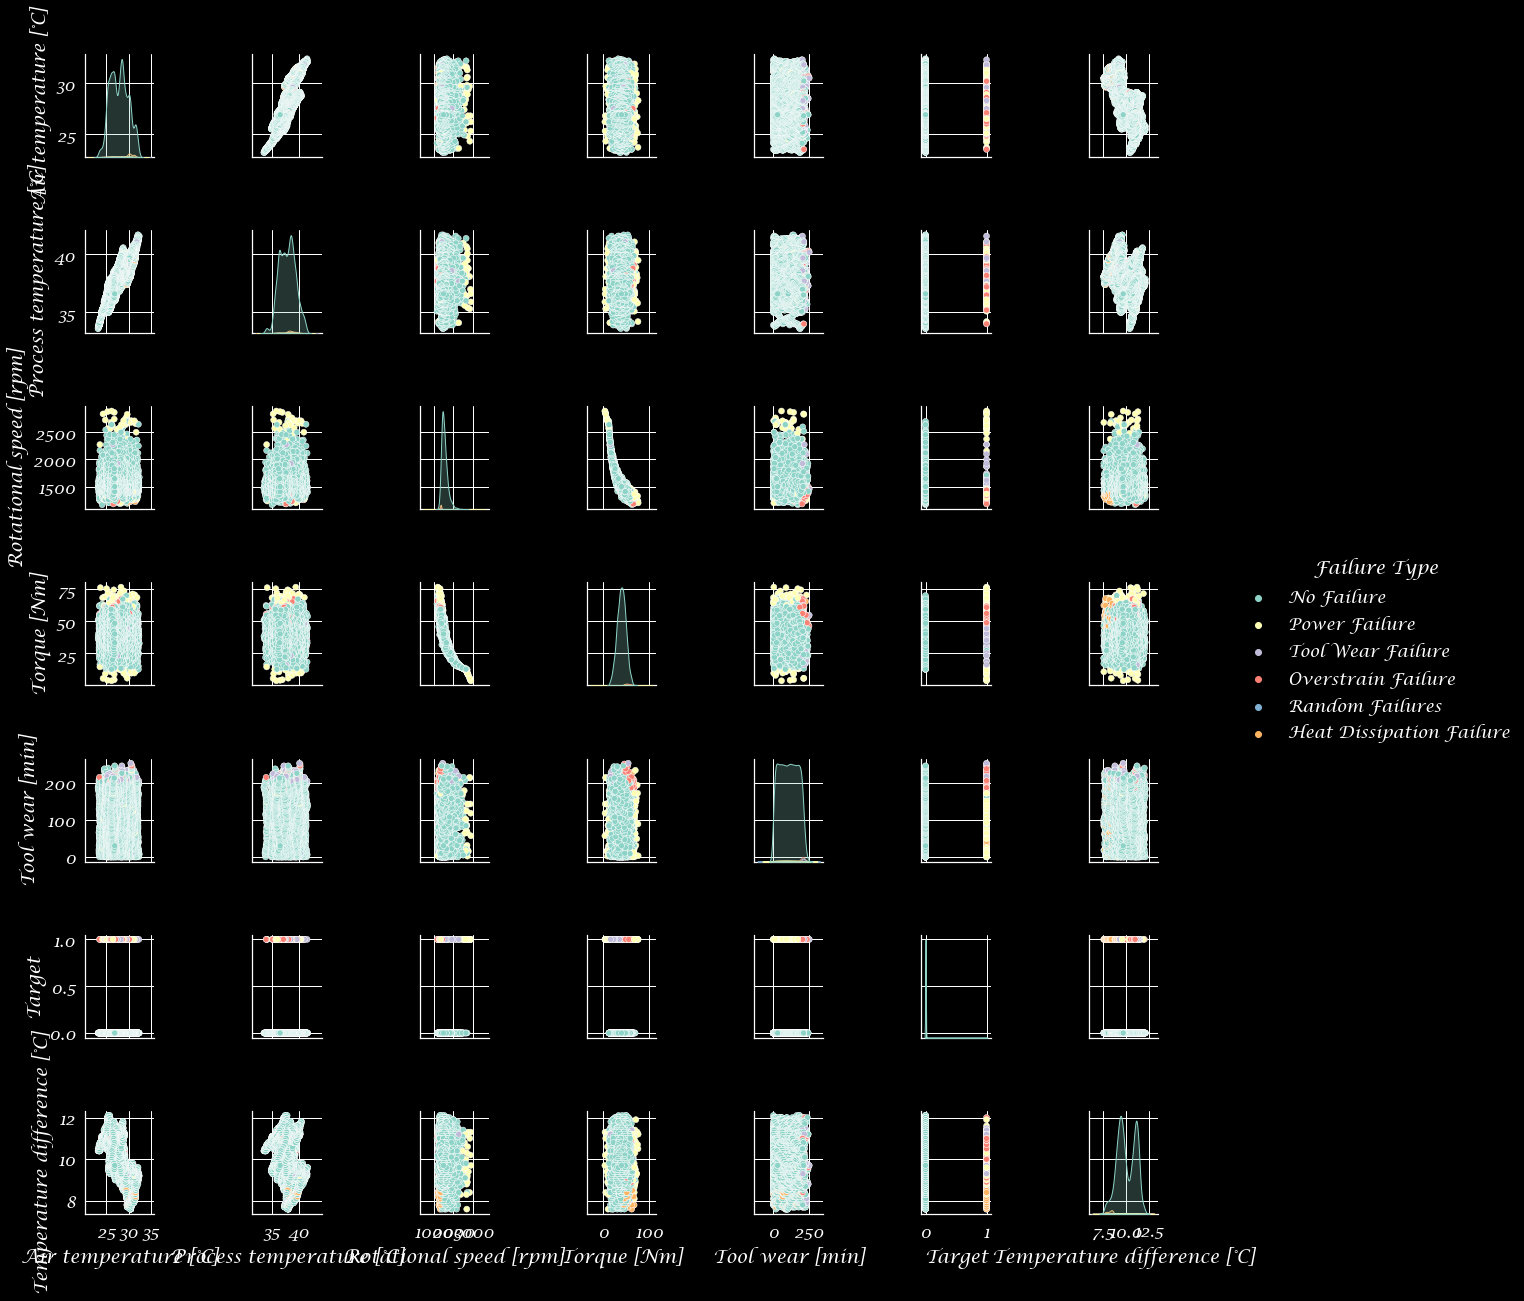

In [539]:
sns.pairplot(df,hue = "Failure Type");

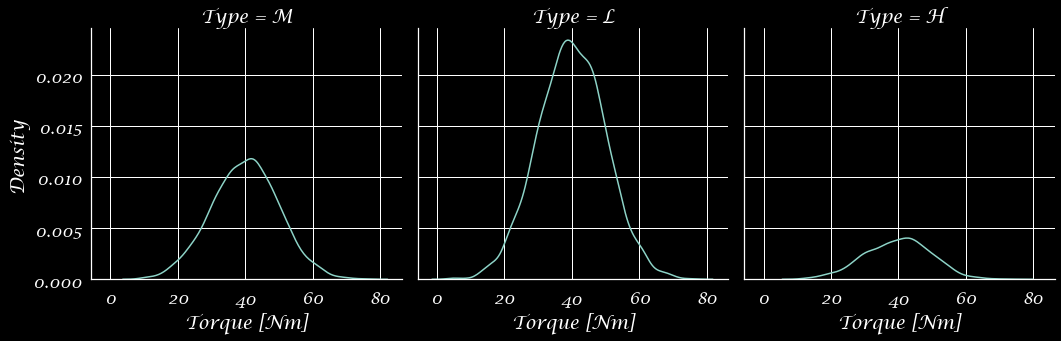

In [540]:
sns.displot(data=df, x="Torque [Nm]", col="Type", kind="kde");

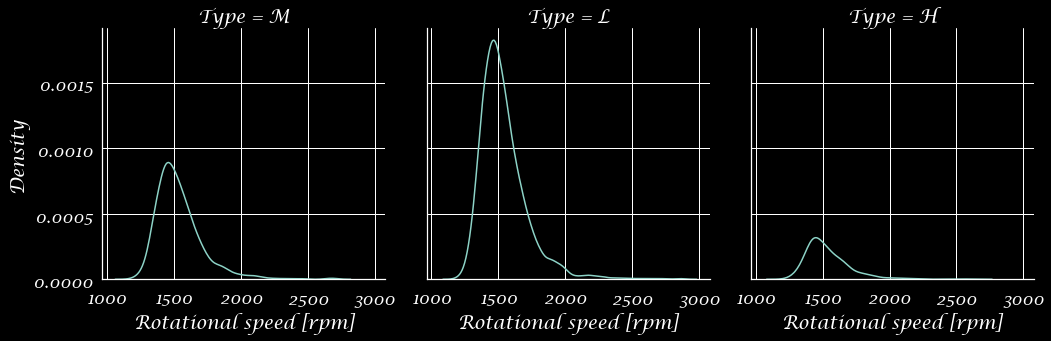

In [541]:
sns.displot(data=df, x="Rotational speed [rpm]", col="Type", kind="kde");

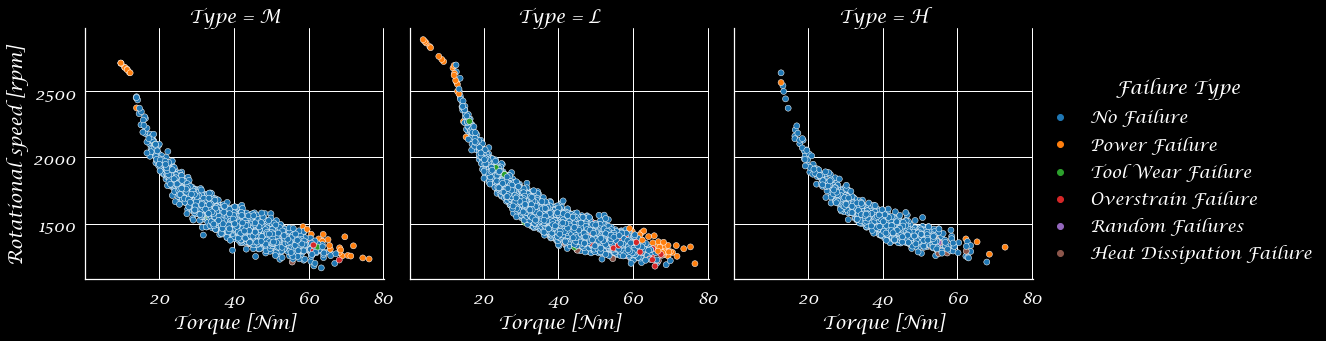

In [542]:
sns.relplot(data=df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10');

3.2.Feature Selection and Data Transforming

In [543]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
df.head(2)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551,42.8,0,0,1,10.5
1,2,26.05,36.55,1408,46.3,3,0,1,10.5


In this section ı used Min-Max Scaling to arange the my datas range to 0-1 and Label Encoding to change my failure types entry as 0-5.

In [544]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()
df.iloc[:,1:5]=scaler1.fit_transform(df.iloc[:,1:5])
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [545]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

Then I split my data to train and test data as  %70 train and %30 test.

In [546]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

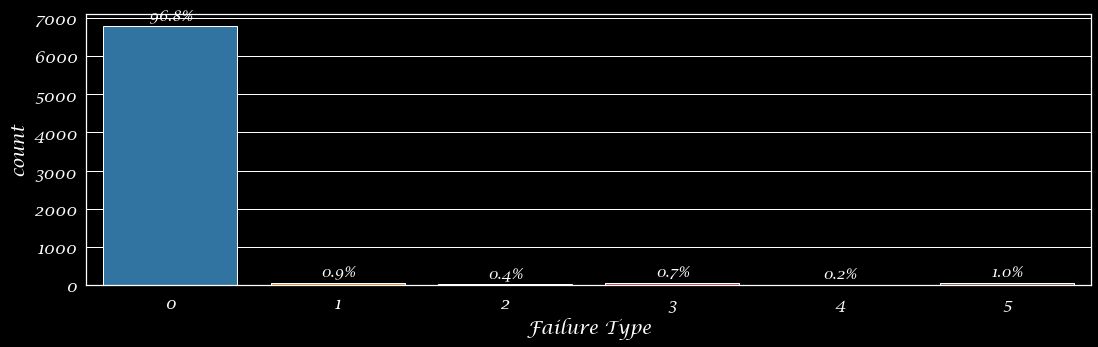

In [547]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

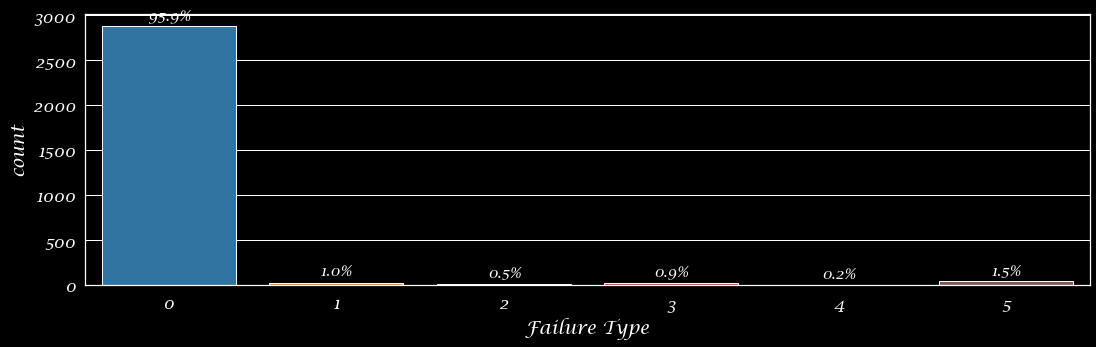

In [548]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

3.4.Model Development

In this Section I tried 7 different Macgine Learning Clustering Algorithm to cluster types of failure succesfully. My Success metric will be accuracy.
While Training models, I used GridSearch with Cross-validation that ı believe helps achieving the high accuracy.

1)LOGİSTİC REGRESSION

Training Accuracy    : 97.93 %
Model Accuracy Score : 97.73 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2876
           1       0.55      0.71      0.62        31
           2       0.17      0.06      0.09        16
           3       0.52      0.46      0.49        28
           4       0.00      0.00      0.00         5
           5       0.73      0.50      0.59        44

    accuracy                           0.98      3000
   macro avg       0.49      0.46      0.47      3000
weighted avg       0.97      0.98      0.97      3000

--------------------------------------------------------


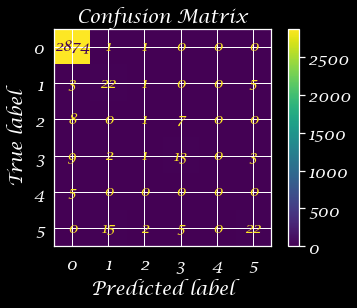

In [549]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")
plot_confusion_matrix(logreg, X_test, y_test);
plt.title('Confusion Matrix');

2)DECISION TREE CLASSIFIER

In [550]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

dtc=DecisionTreeClassifier()
param_grid3 = {'criterion':['gini', 'entropy', 'log_loss'],
               'splitter':['best','random'],
               'min_samples_split':[2,3,4,5],
               'min_samples_leaf':[1,2,3,5],
               'max_features':['auto','sqrt', 'log2']}
grid3 = GridSearchCV(dtc, param_grid3, cv=3)

In [551]:
grid3.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']})

In [552]:
grid3.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'best'}

In [553]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model3 = grid3.best_estimator_
y2_pred3 = model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model3, X_train, y_train, cv=3)
score.mean()

0.9919995303527877

In [554]:
accuracy_score(y_test, y2_pred3)

0.9946666666666667

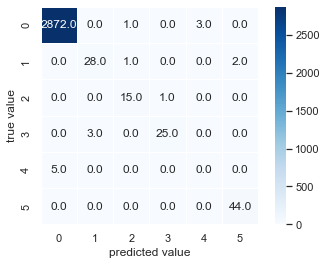

In [555]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [556]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       0.90      0.90      0.90        31
           2       0.88      0.94      0.91        16
           3       0.96      0.89      0.93        28
           4       0.00      0.00      0.00         5
           5       0.96      1.00      0.98        44

    accuracy                           0.99      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.99      0.99      0.99      3000



3)RANDOM FOREST CLASSIFIER

In [614]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

model2=RandomForestClassifier()
param_grid2 = {'n_estimators':[100,110,120,130],
               'criterion':['gini', 'entropy', 'log_loss'],
               'min_samples_split':[2,3,4],
               'max_features':['sqrt', 'log2']}
grid2 = GridSearchCV(model2, param_grid2, cv=3)

In [615]:
grid2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120, 130]})

In [616]:
grid2.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 120}

In [617]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from sklearn.metrics import accuracy_score
rfc_model2 = grid2.best_estimator_
y2_pred2 = rfc_model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(rfc_model2, X_train, y_train, cv=3)
score.mean()

0.9954284692157639

In [618]:
accuracy_score(y_test, y2_pred2)

0.9956666666666667

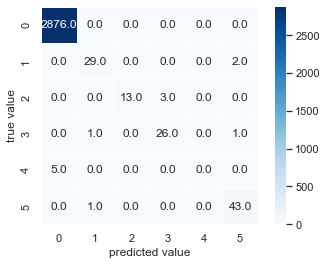

In [619]:

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred2)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [620]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred2, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       0.94      0.94      0.94        31
           2       1.00      0.81      0.90        16
           3       0.90      0.93      0.91        28
           4       0.00      0.00      0.00         5
           5       0.93      0.98      0.96        44

    accuracy                           1.00      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.99      1.00      0.99      3000



4)SUPPORT VECTOR CLASSIFIER

In [609]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
model1=SVC()
param_grid1 = {"C": np.linspace(2.0,5.0, num = 4),
               'kernel':['poly', 'rbf', 'sigmoid'],
               'shrinking':[True,False],
               "degree": [3]}
grid1 = GridSearchCV(model1, param_grid1,cv=5)
grid1.fit(X_train, y_train)
grid1.best_params_

{'C': 2.0, 'degree': 3, 'kernel': 'poly', 'shrinking': True}

In [610]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
svc_model3 = grid1.best_estimator_
y2_pred3 = svc_model3.fit(X_train, y_train).predict(X_test)
score=cross_val_score(svc_model3, X_train, y_train, cv=3)
score.mean()

0.9680000190993132

In [611]:
accuracy_score(y_test, y2_pred3)

0.9586666666666667

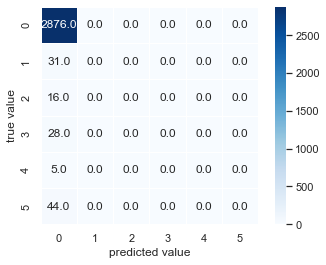

In [612]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred3)
sns.heatmap(mat, square=True, annot=True,cmap=plt.cm.Blues, cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

In [613]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred3, target_names=target_names))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2876
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        44

    accuracy                           0.96      3000
   macro avg       0.16      0.17      0.16      3000
weighted avg       0.92      0.96      0.94      3000



5)Gaussian naive Bayes Classifier

In [569]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
gnb=GaussianNB()
params_gridNB = {'var_smoothing': np.logspace(0,-9, num=100)}
grid = GridSearchCV(gnb,param_grid=params_gridNB,cv=5)
grid.fit(X_train, y_train)
grid.best_params_

{'var_smoothing': 6.579332246575682e-08}

In [570]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
gnb_model1 = grid.best_estimator_
y2_pred = gnb_model1.fit(X_train, y_train).predict(X_test)
score=cross_val_score(gnb_model1, X_train, y_train)
score.mean()

0.9932857142857143

In [571]:
accuracy_score(y_test, y2_pred)

0.9953333333333333

Text(80.90000000000006, 0.5, 'true value')

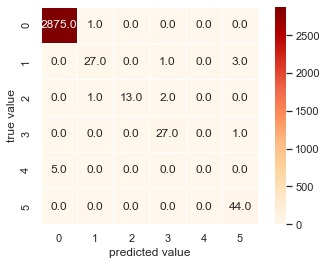

In [572]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value')

In [573]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       0.93      0.87      0.90        31
           2       1.00      0.81      0.90        16
           3       0.90      0.96      0.93        28
           4       0.00      0.00      0.00         5
           5       0.92      1.00      0.96        44

    accuracy                           1.00      3000
   macro avg       0.79      0.77      0.78      3000
weighted avg       0.99      1.00      0.99      3000



6)KNN Classifier

In [574]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
model2=KNeighborsClassifier()

In [575]:
from sklearn.model_selection import GridSearchCV

param_grid = {'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree','kd_tree','brute'],
              'p':[1,2]}
grid = GridSearchCV(model2, param_grid, cv=3)

In [576]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [577]:
grid.best_params_

{'algorithm': 'auto', 'p': 1, 'weights': 'distance'}

In [578]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
model2 = grid.best_estimator_
y2_pred = model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(model2, X_train, y_train, cv=3)
score.mean()

0.9705713253441886

In [579]:
accuracy_score(y_test, y2_pred)

0.9676666666666667

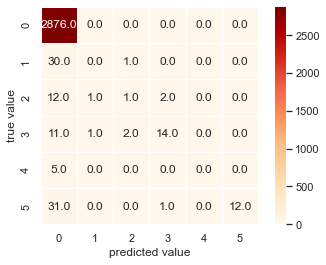

In [580]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [581]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2876
           1       0.00      0.00      0.00        31
           2       0.25      0.06      0.10        16
           3       0.82      0.50      0.62        28
           4       0.00      0.00      0.00         5
           5       1.00      0.27      0.43        44

    accuracy                           0.97      3000
   macro avg       0.51      0.31      0.36      3000
weighted avg       0.95      0.97      0.96      3000



7)AdaBoostClassifier

In [595]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

In [596]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate':[0.05,0.1,0.3,0.5],
              'algorithm':['SAMME','SAMME.R'] }
grid = GridSearchCV(ada, param_grid, cv=3)

In [597]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.05, 0.1, 0.3, 0.5]})

In [598]:
grid.best_params_

{'algorithm': 'SAMME', 'learning_rate': 0.5}

In [599]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # plot formatting
from sklearn.metrics import accuracy_score
ada_model2 = grid.best_estimator_
y2_pred = ada_model2.fit(X_train, y_train).predict(X_test)
score=cross_val_score(ada_model2, X_train, y_train, cv=3)
score.mean()

0.992428407877585

In [600]:
accuracy_score(y_test, y2_pred)

0.995

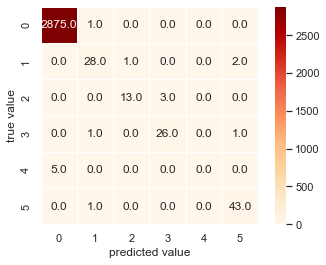

In [601]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y2_pred)
sns.heatmap(mat, square=True, annot=True, cmap = "OrRd",cbar=True,fmt=".1f",linewidth=.5)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [602]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2','3','4','5']
print(classification_report(y_test, y2_pred, target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2876
           1       0.90      0.90      0.90        31
           2       0.93      0.81      0.87        16
           3       0.90      0.93      0.91        28
           4       0.00      0.00      0.00         5
           5       0.93      0.98      0.96        44

    accuracy                           0.99      3000
   macro avg       0.78      0.77      0.77      3000
weighted avg       0.99      0.99      0.99      3000



4. USED METHODOLOGY
In my project, I am using a dataset that contains 8 columns which are process data of a machinery. The goal of this project is to perform Time Series analysis on the data, and to use the classification algorithms as a Predictive Maintenance way of the classifying the Failure Type.If it's a failure.

To achieve this, I have implemented a machine learning model using Python. I have chosen to use a machine learning model because it allows me to automatically learn patterns in the data and make predictions based on those patterns. I have selected and preprocessed the data, and split it into training and testing sets. I have also implemented a number of preprocessing steps, scaling and encoding to around some metrics, in order to prepare the data for analysis. Next, I have trained the model on the training data and evaluated its performance on the testing data. I have used a number of metrics, such as accuracy and F1 score, to evaluate the model's performance and to identify any areas for improvement.

One potential area for improvement is to try different machine learning algorithms or to tune the hyperparameters of the model to see if that leads to better performance. Another option is to try different preprocessing techniques or to add additional features to the data.

For this project, I followed the following methodology:

Data Preprocessing: I turned my datas metrics as I wanted and I used Min-Max Scaling and Lbel Encoding on my data in necessary places.

Model Selection: I compared the performance of several different classification algorithms, including logistic regression, support vector machine, decision tree, random forest, and AdaBoost. I used a number of metrics, including accuracy, precision, recall, and F1 score, to evaluate the performance of each model.

Model Tuning: I used grid search to fine-tune the parameters of the models to optimize their performance. This involved trying different combinations of parameters and selecting the ones that gave the best results.

Evaluation: Finally, I evaluated the performance of the models using a number of metrics, including accuracy, precision, recall, and F1 score.

This project was a good opportunity to apply my knowledge of machine learning and natural language processing to a real-world problem. I learned a lot about the different algorithms and techniques that can be used to classify failure types, and I gained experience in selecting and tuning models to optimize their performance.

5. FINAL PREDICT DEMO

My Tuned Models achived accuracy scores like that;
LR:0.98
Decision Tree:0.9946
Random Forest:0.9953
SVC:0.96
GNMC:0.9932
I chose the using Random Forest Classifier as My Model.
Then I make some prediction on my test data with my chosen model (Random Forest Classifier).

In [621]:
prediction1 = rfc_model2.predict(X_test)
print(prediction1)

[0 0 0 ... 0 0 0]


In [622]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(50).style.background_gradient(
    cmap='coolwarm')

,Actual,Predicted
5690,0,0
6788,0,0
1319,0,0
7196,0,0
8384,0,0
8297,0,0
8417,0,0
8174,0,0
5808,0,0
1016,1,1


6. FUTURE WORKS
One potential direction for future work in Predictive Maintenance could be to expand the scope of the dataset and collect a wider range of datas. This could help to improve the Predictive Maintenance Technics impact.
With the Collection of Wide Range Datas such as Time of Failure can be very important because when we collect time data. Model will cahange and its going to be a Time Series. İn Predictive Maintenance Area, Time Series usually used for the forcasting the time of failure occurs.Knowing the Time of Failures going to happen could be very precious information. Because with this information we can set out maintenance cycles to achive the best performance from machines.
Predictive clustering is a machine learning technique that involves grouping data points into clusters based on their similarity, with the goal of predicting the cluster membership of new data points. There are several potential areas where predictive clustering could continue to evolve and improve in the future. Some potential next steps could include:
Enhanced clustering algorithms: There is ongoing research in the development of more advanced clustering algorithms that can better capture the underlying structure of the data. This could involve the development of algorithms that can handle large datasets more efficiently, or that can handle complex, non-linear data structures.
Integration with other machine learning techniques: Predictive clustering could be integrated with other machine learning techniques, such as classification or regression, to create more sophisticated predictive models.
Increased adoption in various industries: Predictive clustering is already widely used in many industries, but there is potential for further adoption in industries where it has not yet been widely adopted, such as small and medium-sized enterprises or developing countries.
Greater focus on interpretability: As machine learning models become more complex, there may be a greater focus on developing clustering algorithms that are more interpretable and easier to understand.
Overall, the potential for further evolution and improvement in predictive clustering is significant, and will likely depend on ongoing advances in machine learning and data analysis techniques, as well as the specific needs and goals of individual organizations.
Finally, it could be useful to consider the context or source of the comments in the analysis, as this could provide additional insights into the sentiment expressed in the data. For example, analyzing comments from different countries or industries could reveal different patterns or trends in sentiment, and incorporating this contextual information into the models could further improve their accuracy and effectiveness.
As you can see, there are many potential avenues for future work in Predictive Maintenance, and continued exploration of these areas could help to further advance the field and improve our ability to understand and analyze Industrial data.